In [29]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# access file
data_source_csv = "./dataset/sleepdata.csv"
data1 = pd.read_csv(data_source_csv, sep=';')
data_source_csv = "./dataset/sleepdata_2.csv"
data2 = pd.read_csv(data_source_csv, sep=';')
#data2.isnull().sum()
data1

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


In [2]:
for i in range(len(data1['Start'])):
        struct_time = time.strptime(data1["Start"][i], "%Y-%m-%d %H:%M:%S")
        time_stamp = int(time.mktime(struct_time))
        data1.loc[i, 'Start'] = time_stamp
for i in range(len(data1['End'])):
        struct_time = time.strptime(data1["End"][i], "%Y-%m-%d %H:%M:%S")
        time_stamp = int(time.mktime(struct_time))
        data1.loc[i, 'End'] = time_stamp
for i in range(len(data1['Time in bed'])):
        data1.loc[i, 'Time in bed'] = data1.loc[i, 'End'] - data1.loc[i, 'Start']
# 將睡眠品質的值轉成數值
for i in range(len(data1['Sleep quality'])):
    characters = "%"
    x = 0
    try:
        for x in range(len(characters)):
            data1.loc[i, 'Sleep quality'] = float(data1.loc[i, 'Sleep quality'].replace(characters[x],""))    
    except:
        print("error", i)
        break

In [3]:
#type(data1['Start'][0])
type(data1['Sleep quality'][0])

float

In [4]:
y1 = []
y2 = []
x = []
for i in range(100, 200):
    y1.append(data1.loc[i, 'Time in bed'])
    y2.append(data1.loc[i, 'Sleep quality'])
    x.append(i)

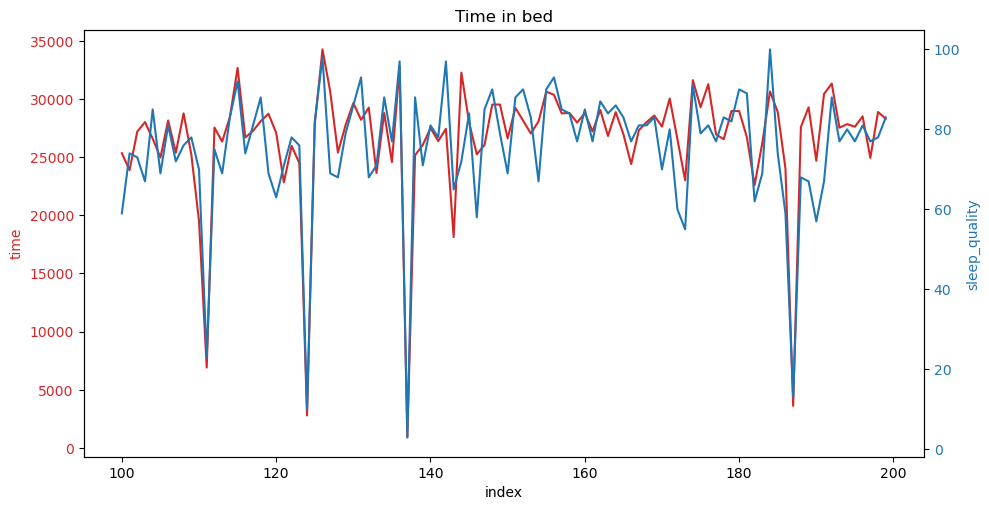

In [5]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax1 = plt.subplots(figsize=(1000*px, 500*px))
color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('time', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sleep_quality', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Time in bed")
plt.show()

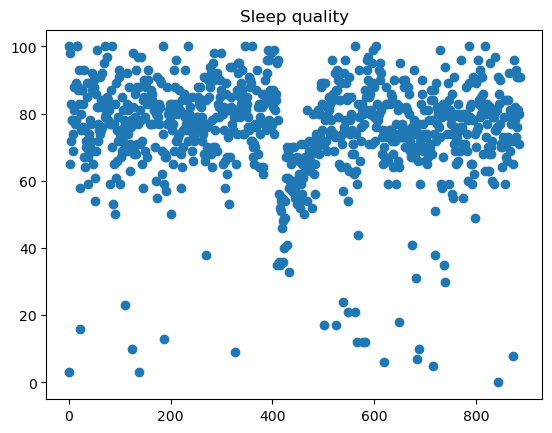

In [6]:
Max_len = []
for i in range(len(data1['Sleep quality'])):
    Max_len.append(i)
plt.scatter(Max_len, data1['Sleep quality'], color=color)
plt.title("Sleep quality")
plt.show()

In [7]:
df1 = data1.drop(['Wake up', 'Heart rate', 'Start', 'End', 'Sleep Notes'], axis = 1)
df1

,Sleep quality,Time in bed,Activity (steps)
0,100.0,30744,0
1,3.0,964,0
2,98.0,30642,0
3,65.0,27120,0
4,72.0,24265,0
...,...,...,...
882,91.0,32881,56
883,81.0,25894,64
884,71.0,32207,3316
885,80.0,33239,6555


In [8]:
data1['Sleep Notes'][7]

'Ate late:Drank coffee'

In [9]:
note_status = [0,0,0,0,0]
note_status[0] = 1
note_status

[1, 0, 0, 0, 0]

In [10]:
#將資料做數值轉換，並建立一個新column儲存它們
j = 0
for j in range(len(data1['Sleep Notes'])):
    list_Sleep_notes = ["Stressful day", 'Drank coffee', 'Drank tea', 'Ate late', 'Worked out'] #所有活動
    Sleep_notes = data1['Sleep Notes'][j]
    float_types = data1['Sleep Notes'][0] 
    note_status = [0,0,0,0,0]
    try:
        if (type(Sleep_notes) != type(float_types)):
            length = len(Sleep_notes.split(':'))
            if length >=2:
                for i in range(length):
                    if Sleep_notes.split(':')[i] == list_Sleep_notes[0]:
                        df1.loc[j, 'Stressful day'] = 1
                        note_status[0] = 1
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[1]:
                        df1.loc[j, 'Drank coffee'] = 1
                        note_status[1] = 1
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[2]:
                        df1.loc[j, 'Drank tea'] = 1
                        note_status[2] = 1
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[3]:
                        df1.loc[j, 'Ate late'] = 1
                        note_status[3] = 1
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[4]:
                        df1.loc[j, 'Worked out'] = 1
                        note_status[4] = 1
                for i in range(5):
                    if note_status[i] == 0:
                        df1.loc[j, list_Sleep_notes[i]] = 0
            else:
                i = 0
                for i in range(length):
                    if Sleep_notes.split(':')[i] == list_Sleep_notes[0]:
                        df1.loc[j, 'Stressful day'] = 1
                        df1.loc[j, 'Drank coffee'] = 0
                        df1.loc[j, 'Drank tea'] = 0
                        df1.loc[j, 'Ate late'] = 0
                        df1.loc[j, 'Worked out'] = 0
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[1]:
                        df1.loc[j, 'Stressful day'] = 0
                        df1.loc[j, 'Drank coffee'] = 1
                        df1.loc[j, 'Drank tea'] = 0
                        df1.loc[j, 'Ate late'] = 0
                        df1.loc[j, 'Worked out'] = 0
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[2]:
                        df1.loc[j, 'Stressful day'] = 0
                        df1.loc[j, 'Drank coffee'] = 0
                        df1.loc[j, 'Drank tea'] = 1
                        df1.loc[j, 'Ate late'] = 0
                        df1.loc[j, 'Worked out'] = 0
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[3]:
                        df1.loc[j, 'Stressful day'] = 0
                        df1.loc[j, 'Drank coffee'] = 0
                        df1.loc[j, 'Drank tea'] = 0
                        df1.loc[j, 'Ate late'] = 1
                        df1.loc[j, 'Worked out'] = 0
                    elif Sleep_notes.split(':')[i] == list_Sleep_notes[4]:
                        df1.loc[j, 'Stressful day'] = 0
                        df1.loc[j, 'Drank coffee'] = 0
                        df1.loc[j, 'Drank tea'] = 0
                        df1.loc[j, 'Ate late'] = 0
                        df1.loc[j, 'Worked out'] = 1
        else:
            df1.loc[j, 'Stressful day'] = 0
            df1.loc[j, 'Drank coffee'] = 0
            df1.loc[j, 'Drank tea'] = 0
            df1.loc[j, 'Ate late'] = 0
            df1.loc[j, 'Worked out'] = 0
    except:
        print("error", j)

In [11]:
df1['Stressful day'].unique()

array([0., 1.])

In [12]:
y1 = []
y2 = []
x = []
for i in range(100, 800):
    y1.append(df1.loc[i, 'Time in bed'])
    y2.append(df1.loc[i, 'Sleep quality'])
    x.append(i)

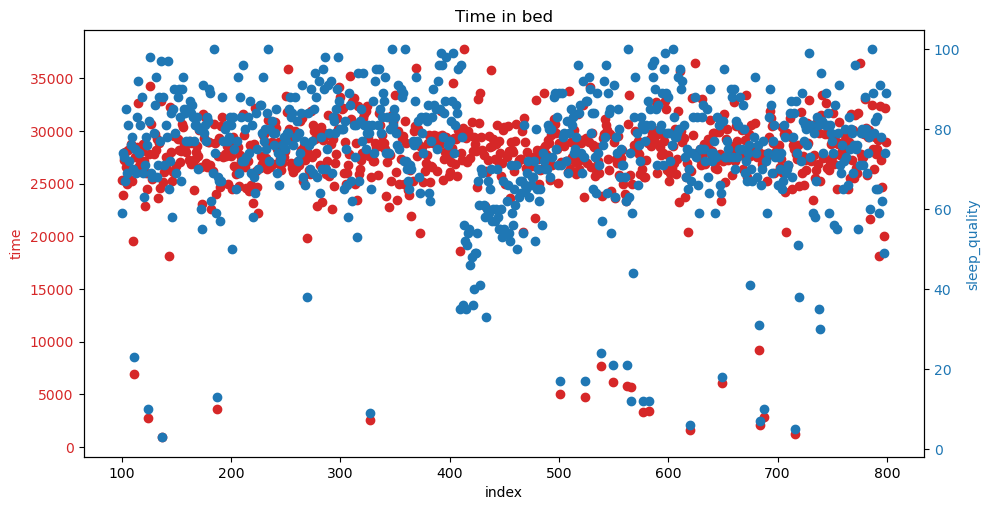

In [13]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax1 = plt.subplots(figsize=(1000*px, 500*px))
color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('time', color=color)
ax1.scatter(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sleep_quality', color=color)  # we already handled the x-label with ax1
ax2.scatter(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Time in bed")
plt.grid(axis='x')
plt.show()

In [31]:
# 開始對資料做分配
df1_target = df1['Sleep quality']
df1_last = df1.drop('Sleep quality', axis=1)
data1_train,data1_test,target1_train,target1_test = train_test_split(df1_last,df1_target, test_size=0.4,random_state=47)

,Time in bed,Activity (steps),Stressful day,Drank coffee,Drank tea,Ate late,Worked out
342,23772,0,0.0,1.0,1.0,0.0,0.0
555,25788,2983,0.0,1.0,1.0,0.0,0.0
779,29687,3240,0.0,0.0,0.0,0.0,0.0
355,27316,0,0.0,1.0,0.0,0.0,1.0
83,26816,0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
691,27868,114,0.0,0.0,0.0,0.0,0.0
584,28539,6388,0.0,1.0,1.0,0.0,1.0
264,28206,0,0.0,1.0,0.0,0.0,0.0
327,2552,0,0.0,0.0,0.0,0.0,0.0


In [94]:
# 特徵縮放
from sklearn import preprocessing
#scaler_time_bed = preprocessing.StandardScaler().fit(df1['Time in bed'].values[:].reshape(-1,1))
#scaler_time_bed.transform(df1['Drank coffee'].values[:].reshape(-1,1))
scaler = preprocessing.StandardScaler().fit(data1_train.values[:])
std_data1_train = scaler.transform(data1_train.values[:])
std_data1_test = scaler.transform(data1_test.values[:])

scaler_target = preprocessing.StandardScaler().fit(target1_train.values[:].reshape(-1,1))
std_target1_train = scaler_target.transform(target1_train.values[:].reshape(-1,1))
std_target1_test = scaler_target.transform(target1_test.values[:].reshape(-1,1))

In [100]:
std_data1_train

array([[-0.8006727 , -0.77730467, -0.29653762, ...,  0.98878469,
        -0.17033361, -0.84951919],
       [-0.37409739,  0.12033188, -0.29653762, ...,  0.98878469,
        -0.17033361, -0.84951919],
       [ 0.45091111,  0.19766765, -0.29653762, ..., -1.01134252,
        -0.17033361, -0.84951919],
       ...,
       [ 0.13753907, -0.77730467, -0.29653762, ..., -1.01134252,
        -0.17033361, -0.84951919],
       [-5.29071638, -0.77730467, -0.29653762, ..., -1.01134252,
        -0.17033361, -0.84951919],
       [-0.62928083, -0.77730467, -0.29653762, ...,  0.98878469,
        -0.17033361,  1.17713645]])

In [113]:
# 訓練模型
from sklearn import svm
from sklearn import metrics
linearModel = svm.SVR(C=100, kernel = 'rbf', gamma = 'auto')
linearModel.fit(std_data1_train, target1_train.values[:])
predicted1 = linearModel.predict(std_data1_test)
print('R2 score: ', linearModel.score(std_data1_train, target1_train.values[:]))
print('MSE: ', metrics.mean_squared_error(target1_test.values[:], predicted1))
linearModel.fit(std_data1_train, std_target1_train.ravel())
predicted2 = linearModel.predict(std_data1_test)
print('this is standafter...')
print('R2 score: ', linearModel.score(std_data1_train, std_target1_train))
print('MSE: ', metrics.mean_squared_error(std_target1_test, predicted2))

R2 score:  0.6150259756006287
MSE:  111.99563269084084
this is standafter...
R2 score:  0.6788497388210071
MSE:  0.5827818638081951


In [121]:
predicted1[0]
std_target1_test[1][0]

-0.014877634141911653

In [130]:
y1 = []
y2 = []
x = []
for i in range(100, 200):
    y1.append(predicted2[i])
    y2.append(std_target1_test[i][0])
    x.append(i)

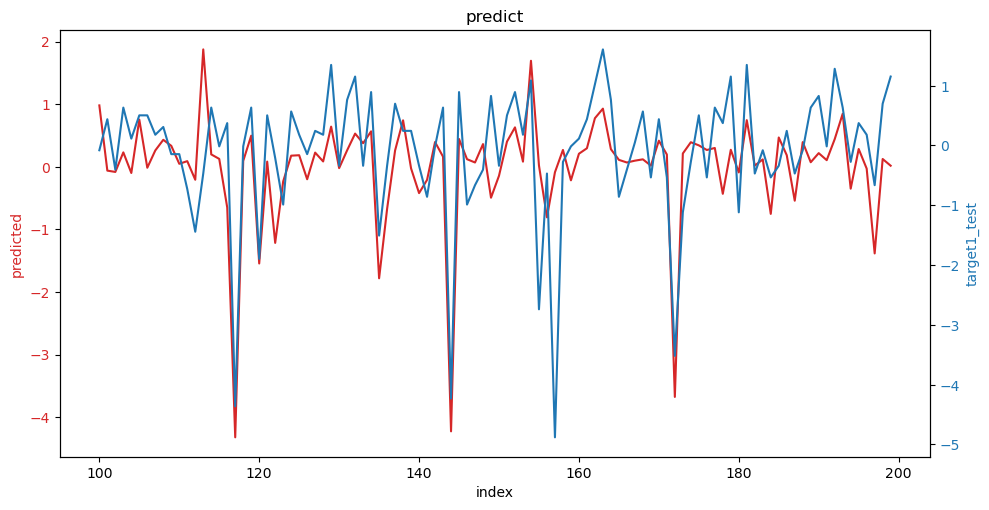

In [131]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax1 = plt.subplots(figsize=(1000*px, 500*px))
color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('predicted', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('target1_test', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("predict")
plt.grid(axis='x')
plt.show()